In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [59]:
# file_output = 'lupft-nocomp_on.fates-sci.1.67.2_api.27.0.0-v2.1.0-C98340221c5-F46717980.gnu.elm.h0.2000-01-01-00000.nc'
file_output = 'lupft-nocomp_on-diag4-yearfix.fates-sci.1.67.2_api.27.0.0-v2.1.0-C0530a082f5-F46717980.gnu.elm.h0.2000-01-01-00000.nc'
file_transitions = '/home/glemieux/parameter_files/LUH2_states_transitions_management.timeseries_4x5_hist_simyr1850-2015_c230727.nc'
file_yearcor = '/home/glemieux/parameter_files/LUH2_historical_0850_2015_4x5_correctedyear.nc'

In [62]:
ds_out = xr.open_dataset(file_output)

ValueError: All-NaN slice encountered

In [18]:
ds_out.FATES_TRANSITION_MATRIX_LULU

<xarray.DataArray 'FATES_TRANSITION_MATRIX_LULU' (time: 365, fates_levlulu: 25,
                                                  lat: 46, lon: 72)>
[30222000 values with dtype=float32]
Coordinates:
  * time     (time) object 2000-01-01 00:00:00 ... 2000-12-31 00:00:00
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
Dimensions without coordinates: fates_levlulu
Attributes:
    long_name:     land use transition matrix
    units:         m2 m-2 yr-1
    cell_methods:  time: mean

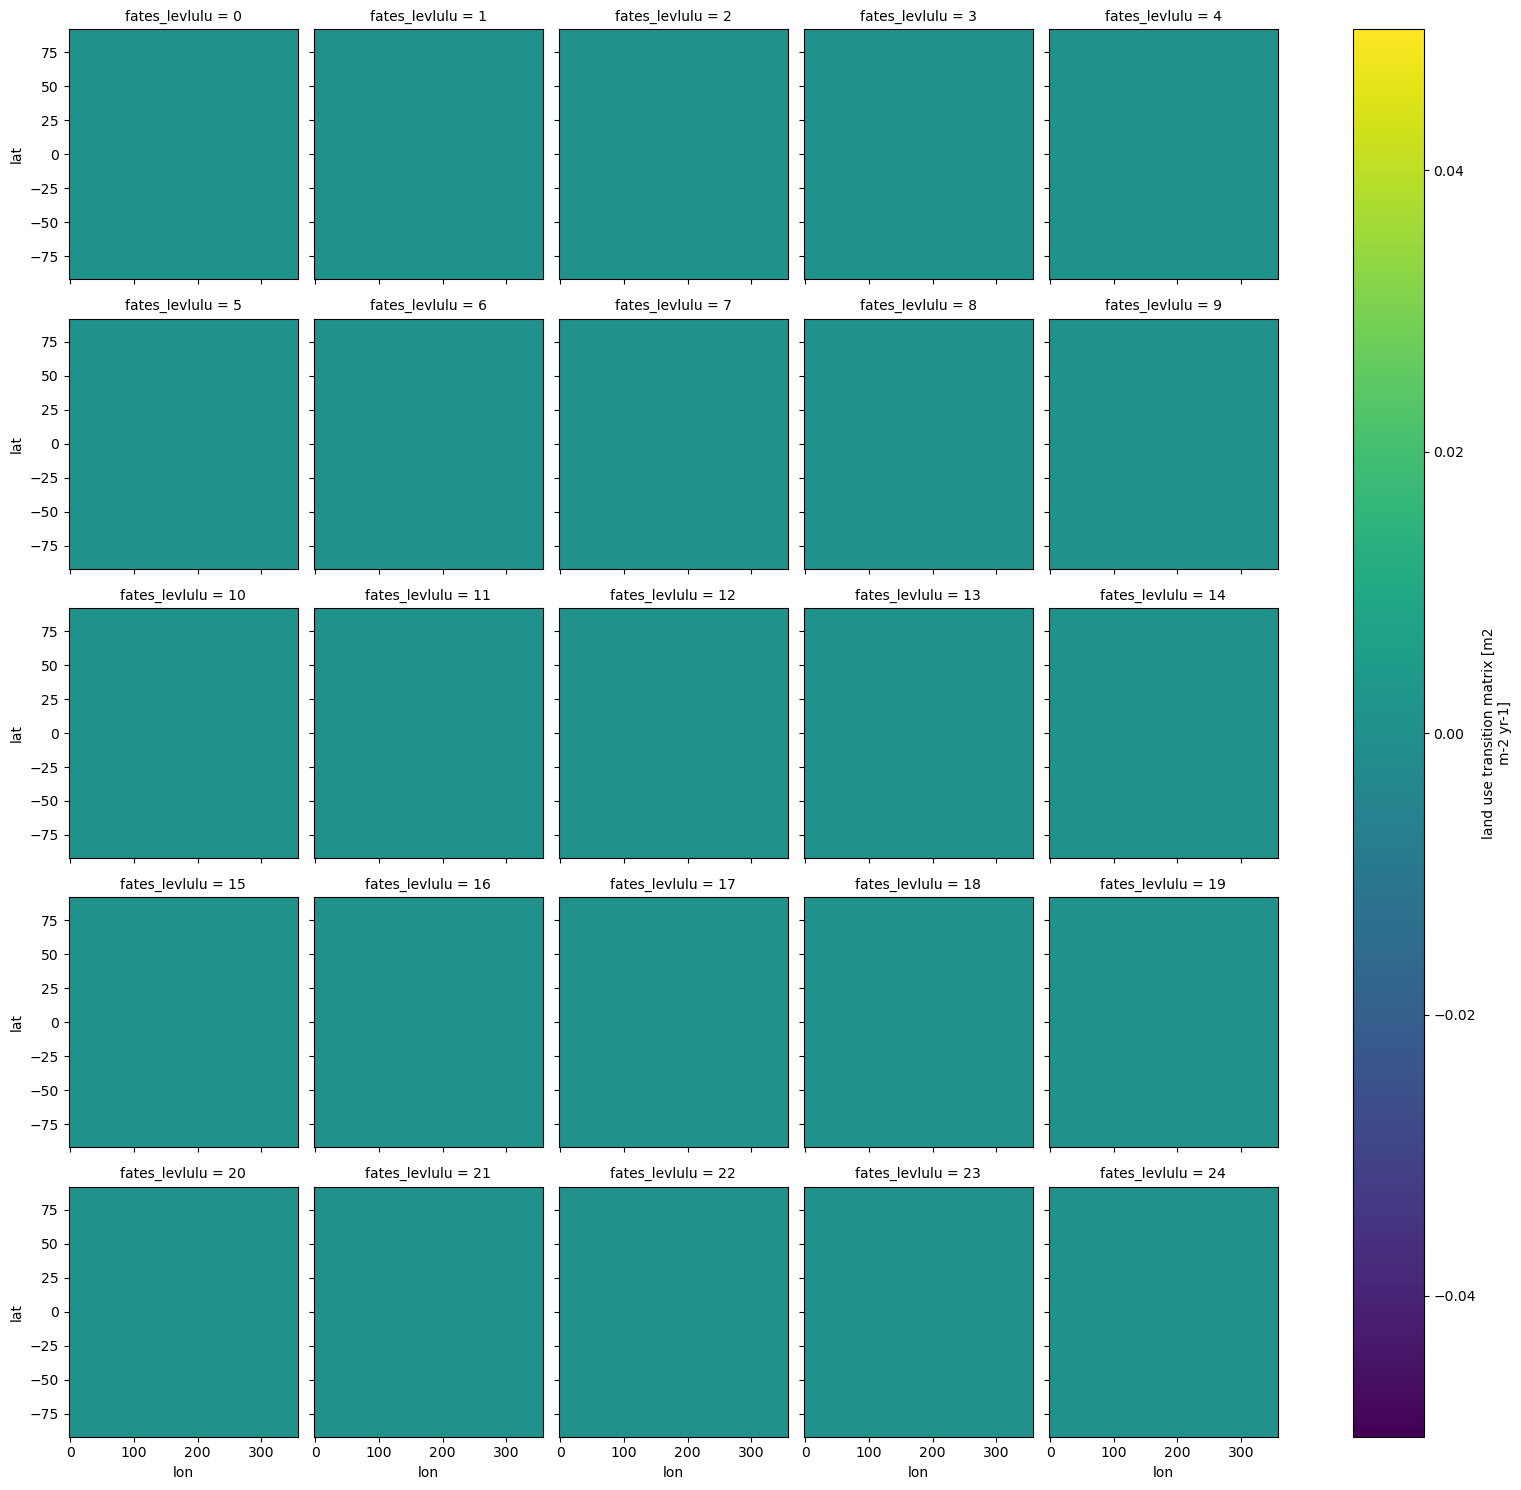

In [20]:
ds_out.FATES_TRANSITION_MATRIX_LULU.isel(time=250).plot(x='lon',y='lat',col='fates_levlulu', col_wrap=5)

In [50]:
ds_lufile = xr.open_dataset(file_transitions,decode_times=False)
ds_yearfile = xr.open_dataset(file_yearcor, decode_times=False)

In [53]:
ds_lufile.YEAR.isel(time=0).values

array(1000.)

In [51]:
ds_yearfile.YEAR.isel(time=0).values

array(850)

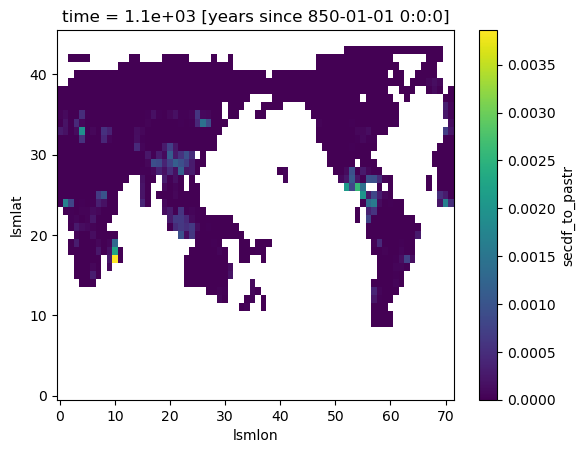

In [43]:
ds_lufile.secdf_to_pastr.isel(time=100).plot()

In [56]:
ds_lufile["YEAR"] = ds_lufile.YEAR + 850

In [57]:
ds_lufile.YEAR

<xarray.DataArray 'YEAR' (time: 166)>
array([1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857., 1858.,
       1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867.,
       1868., 1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876.,
       1877., 1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885.,
       1886., 1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894.,
       1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903.,
       1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912.,
       1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015.])
Coordinates:
  * time     (time) float64 1e+03 1.001e+03 1.002e+03 ... 1.164e+03 1.165e+03

In [58]:
ds_lufile.to_netcdf('/home/glemieux/parameter_files/LUH2_states_transitions_management.timeseries_4x5_hist_simyr1850-2015_c231101.nc')